
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)





An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Set the background style for the plots
sns.set_style("whitegrid")  # Options include: "darkgrid", "whitegrid", "dark", "white", and "ticks"
# Set the background color for the figures
plt.rcParams['figure.facecolor'] = 'lightblue'


#### Code to avoid cell auto-scrolling

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:\
    - Email: email of the customer.\
    - Address: address of the customer.\
    - Avatar: color of the avatar.\
    - Avg. Session Length: Average session of in-store style advice sessions.\
    - Time on App: Average time spent on App in minutes\
    - Time on Website: Average time spent on Website in minutes.\
    - Length of Membership: How many years the customer has been a member.

In [5]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [6]:
customers.shape

(500, 8)

In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:\
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove those variables.\
    - Check for missing values\
    - check the distribution of the target variable to see if there is some outlier\
    - check which are the variables with highest correlation with the target variable\
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [8]:
#PUT YOUR CODE HERE
## Add further cells in case you need
customers_c = customers.copy()
customers_c = customers_c.drop(['Email', 'Address', 'Avatar'], axis=1)


The Email, Address, and Avatar columns contain customer contact information, but likely do not directly influence the target Yearly Amount Spent. They seem do not contribute to a pattern

#### Check Missing values

In [9]:
#PUT YOUR CODE HERE

## Add further cells in case you need
customers_c.isnull().sum()*100/customers_c.shape[0]


Avg. Session Length     0.0
Time on App             0.0
Time on Website         0.0
Length of Membership    0.0
Yearly Amount Spent     0.0
dtype: float64

We have not missing values

#### Check disttribution of the target variable

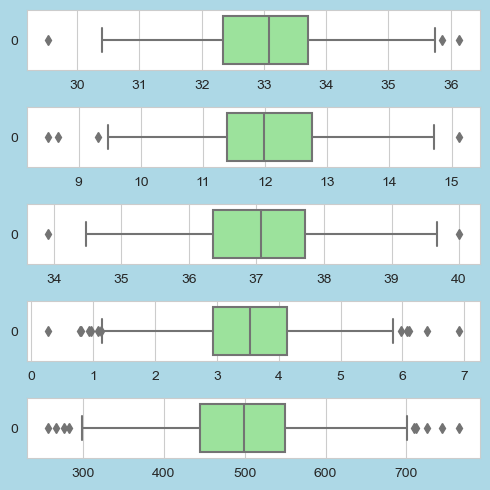

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(5, figsize = (5,5))
plt0 = sns.boxplot(customers_c['Avg. Session Length'], ax = axs[0], orient='h', color='lightgreen')
plt1 = sns.boxplot(customers_c['Time on App'], ax = axs[1], orient='h', color='lightgreen')
plt2 = sns.boxplot(customers_c['Time on Website'], ax = axs[2], orient='h', color='lightgreen')
plt3 = sns.boxplot(customers_c['Length of Membership'], ax = axs[3], orient='h', color='lightgreen')
plt4 = sns.boxplot(customers_c['Yearly Amount Spent'], ax = axs[4], orient='h', color='lightgreen')
plt.tight_layout()

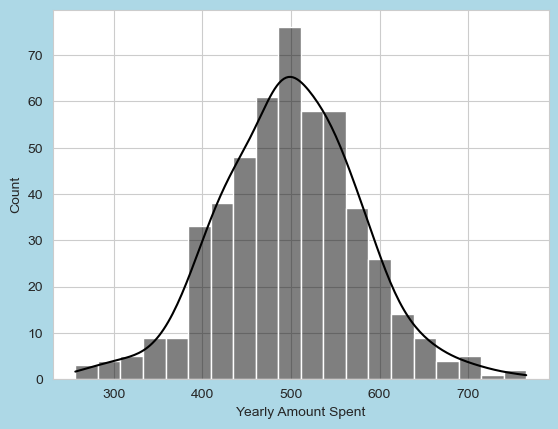

In [11]:
#PUT YOUR CODE HERE

## Add further cells in case you need
sns.histplot(customers_c['Yearly Amount Spent'], kde=True, color='black')
plt.show()


Since the histogram shows that 'Yearly Amount Spent' is approximately normally distributed with a slight right skew, we find not necessary to treat outliers. 

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

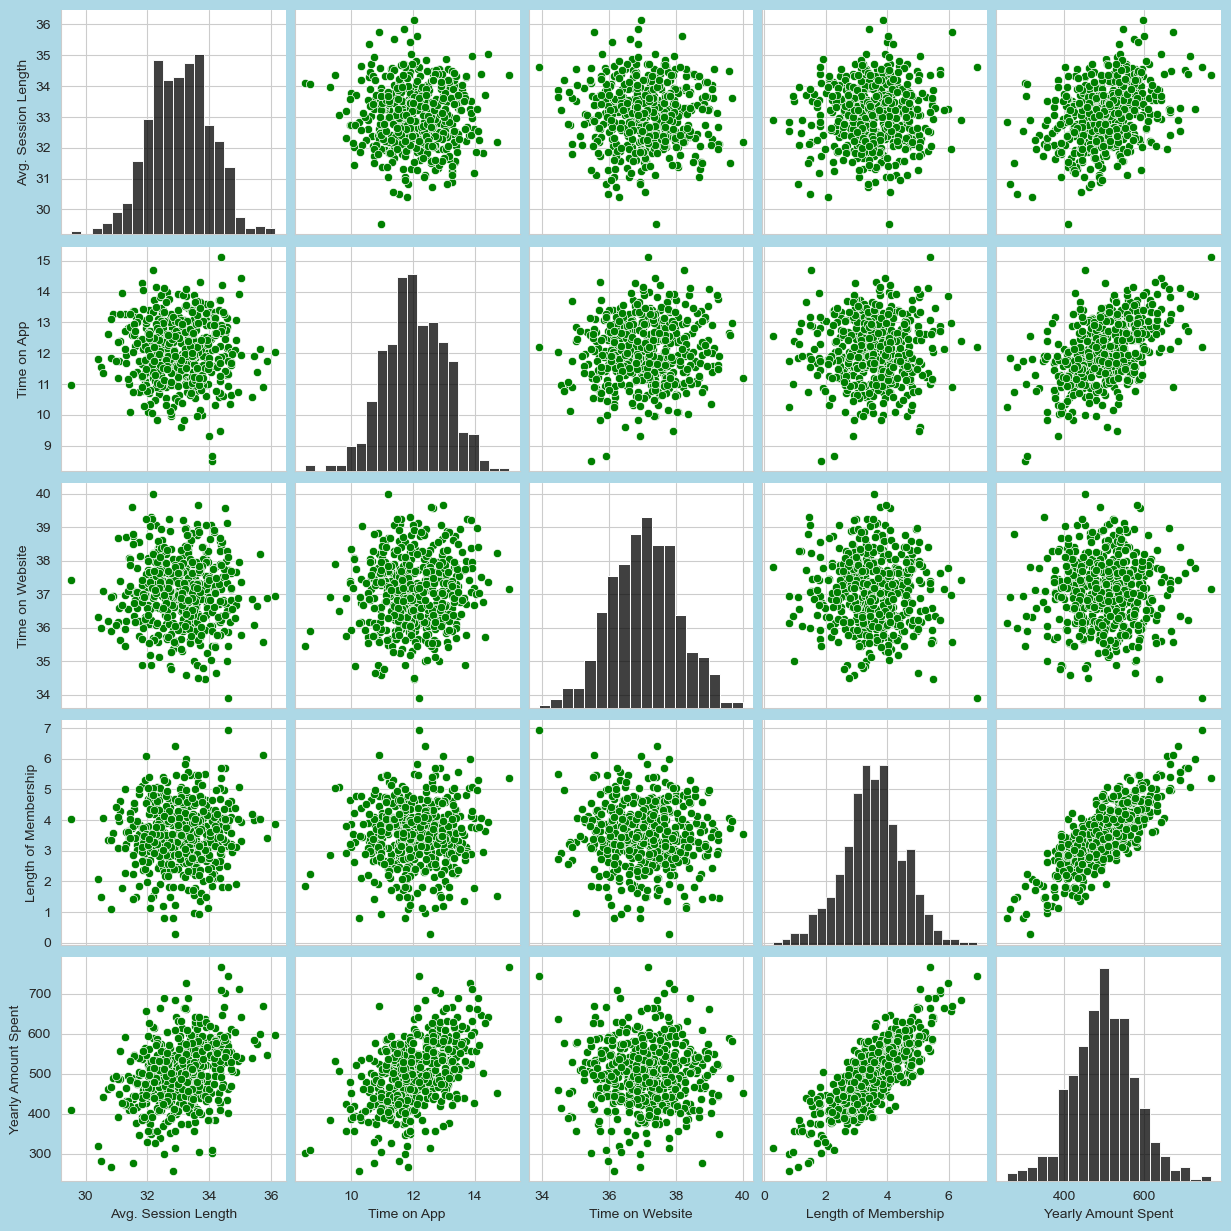

In [12]:
#  Creating a pairplot
sns.pairplot(customers_c, height=2.5, plot_kws={'color': 'green'}, diag_kws={'color': 'black'})

Avg. Session Length & Time on App vs. Yearly Amount Spent: There appears to be a moderate positive relationship, indicating that customers who have longer average session lengths tend to spend more.

Time on Website vs. Yearly Amount Spent: The relationship seems weaker here compared to the 'Time on App'. It's less clear whether increased time on the website has a strong influence on yearly spending.

Length of Membership vs. Yearly Amount Spent: There is a clear positive relationship, suggesting that customers with longer memberships tend to spend more. This indicates that customer loyalty and retention could be key factors for increasing yearly revenue.

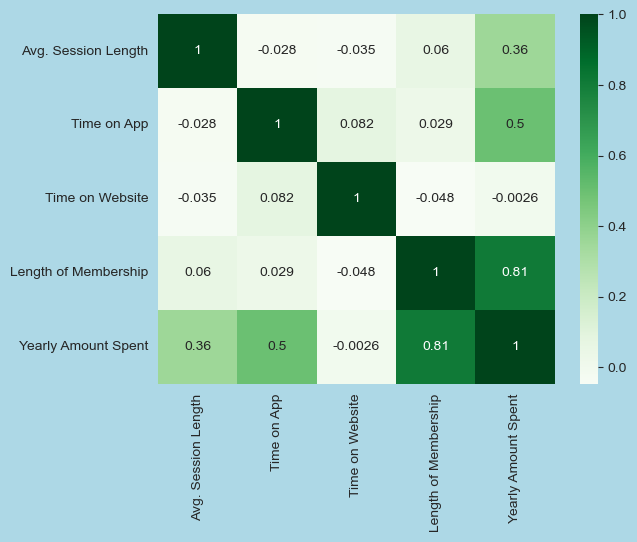

In [13]:

## Add further cells in case you need
correlation_matrix = customers_c.corr()
sns.heatmap(correlation_matrix, cmap="Greens", annot=True)
plt.show()

In [14]:
correlation_matrix

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


The independent variables do not show strong correlations with each other, which is generally good for a regression model because it suggests low multicollinearity.

The strong correlation between 'Yearly Amount Spent' and 'Length of Membership' could be an indication that customer loyalty is an important factor in revenue generation. In contrast, the weaker correlation with 'Time on Website' suggests that the website may not be as effective at driving sales as the app.

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

## Simple linear regression

In [15]:
# Prepare data for training
#PUT YOUR CODE HERE

## Add further cells in case you need
X = customers_c[['Length of Membership']]
Y = customers_c['Yearly Amount Spent']

For this Simple Linear Regression, we chose the 'Length of Membership' variable as our independent variable as it has the highest correlation with the 'Yearly Amount Spent'

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [16]:
#PUT YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

print("Training set size:")
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)

print("\nTesting set size:")
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

Training set size:
X_train: (375, 1)
Y_train: (375,)

Testing set size:
X_test: (125, 1)
Y_test: (125,)


### Training of the model

In [17]:
#PUT YOUR CODE HERE
lr = LinearRegression()
lm = lr.fit(X_train, Y_train)

#### Print the coeficients of the model

In [18]:
#PUT YOUR CODE HERE
lm.coef_

array([65.14793731])

In [19]:
lm.intercept_

269.6540359238166

### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

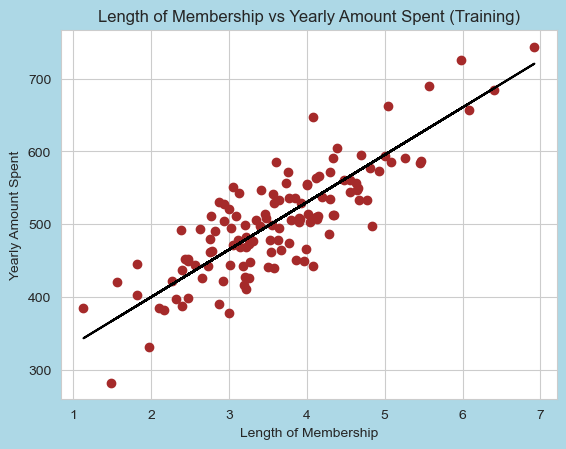

In [20]:
#PUT YOUR CODE HERE

plt.scatter(X_test, Y_test, color = "brown")
plt.plot(X_test, lm.predict(X_test), color = "black")
plt.title("Length of Membership vs Yearly Amount Spent (Training)")
plt.xlabel('Length of Membership')
plt.ylabel("Yearly Amount Spent")
plt.show()


Since we were expecting a positive relantionship between 'Length of Membership' and 'Yearly Amount Spent', we can interpret:

**Coefficient Interpretation:**

The coefficient for 'Length of Membership' is approximately 65.15. This means that for every additional year of membership, the model predicts an increase of about $65.15 in the 'Yearly Amount Spent', on average, holding all other factors constant.
This positive coefficient aligns with the positive correlation observed in the correlation matrix, validating the direction of the relationship in the model.

**Intercept Interpretation:**

The intercept of the model is approximately 269.65. This can be interpreted as the baseline 'Yearly Amount Spent' that the model predicts. It is knows as the slope of the curve. 

**Model Fit:**

The plot shows that the linear regression line goes through the cluster of points, indicating a good fit for the model based on the 'Length of Membership'. The line appears to capture the upward trend that longer membership is associated with higher spending.
Most data points are distributed around the regression line, which suggests that 'Length of Membership' is a strong predictor of 'Yearly Amount Spent'.

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

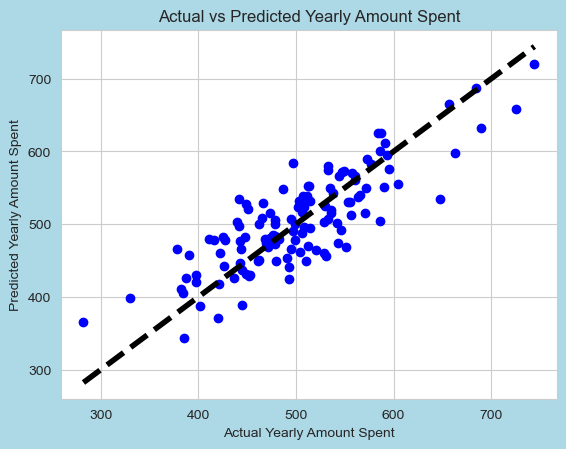

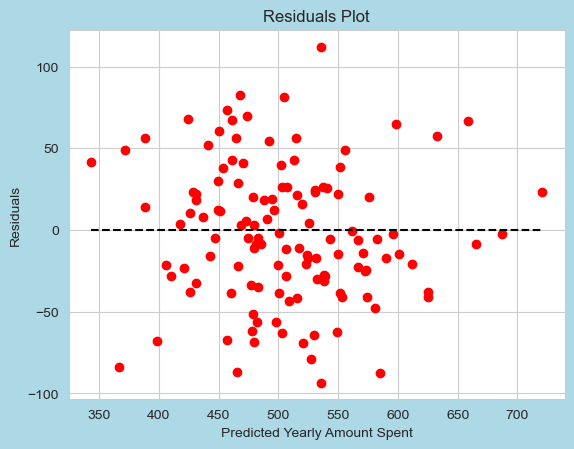

Mean Absolute Error (MAE): 34.032330905266065
Mean Squared Error (MSE): 1744.646561976358
Root Mean Squared Error (RMSE): 41.768966493993574
R-squared (R2): 0.6889559142164579


In [21]:

# Predict on the test set
Y_pred = lm.predict(X_test)

# Plotting actual vs predicted values
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line for reference
plt.show()

# Plotting residuals
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals, color='red')
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='black', linestyles='--')
plt.xlabel('Predicted Yearly Amount Spent')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)




## Multivariate Model

In [22]:
# Prepare data for training

#PUT YOUR CODE HERE
X_m = customers_c.drop(['Yearly Amount Spent','Time on Website'], axis=1)
Y_m = customers_c['Yearly Amount Spent']


Since the 'Time on Website' has a null correlation with 'Yearly Amount Spent', we are not considering it into the analysis

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [23]:
#PUT YOUR CODE HERE

X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.25, random_state=5)

# Print the sizes of the training and test sets
print("Training set size:")
print("X_train:", X_train_m.shape)
print("Y_train:", Y_train_m.shape)

print("\nTesting set size:")
print("X_test:", X_test_m.shape)
print("Y_test:", Y_test_m.shape)


Training set size:
X_train: (375, 3)
Y_train: (375,)

Testing set size:
X_test: (125, 3)
Y_test: (125,)


### Training of the model

In [24]:
#PUT YOUR CODE HERE

## Add further cells in case you need
lin_model = LinearRegression()
lin_model.fit(X_train_m, Y_train_m)


LinearRegression()

#### Print the coeficients of the model

In [25]:
#PUT YOUR CODE HERE

## Add further cells in case you need
lin_model.coef_


array([25.88380763, 38.53369136, 61.79289105])

In [26]:
lin_model.intercept_

-1038.8417386406484

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

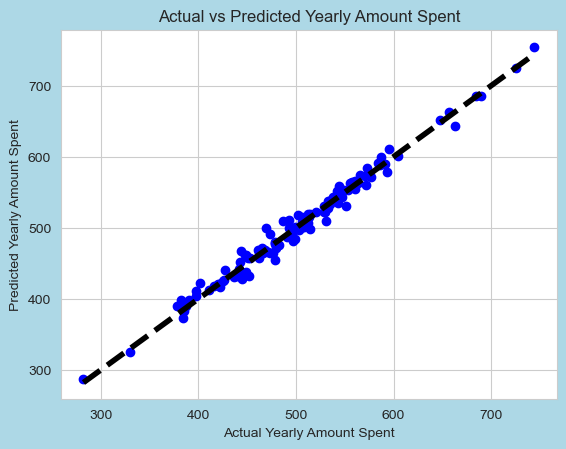

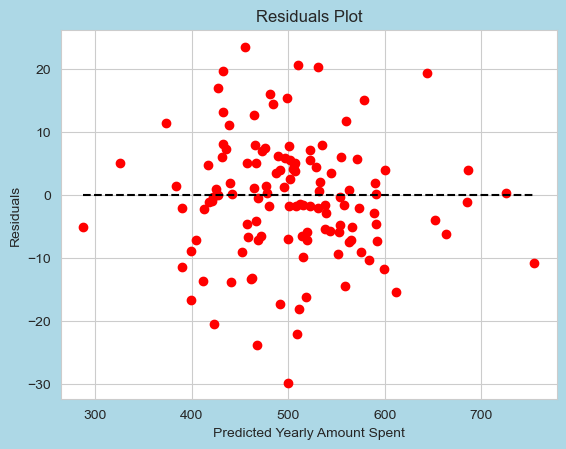

Mean Absolute Error (MAE): 7.3828794474754575
Mean Squared Error (MSE): 92.76139447289304
Root Mean Squared Error (RMSE): 9.631271695518357
R-squared (R2): 0.9834620468301943


In [27]:
#PUT YOUR CODE HERE

# Predict on the test set
Y_pred_m = lin_model.predict(X_test_m)

# Plotting actual vs predicted values
plt.scatter(Y_test_m, Y_pred_m, color='blue')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.plot([Y_test_m.min(), Y_test_m.max()], [Y_test_m.min(), Y_test_m.max()], 'k--', lw=4)  # Diagonal line for reference
plt.show()

# Plotting residuals
residuals = Y_test_m - Y_pred_m
plt.scatter(Y_pred_m, residuals, color='red')
plt.hlines(y=0, xmin=Y_pred_m.min(), xmax=Y_pred_m.max(), colors='black', linestyles='--')
plt.xlabel('Predicted Yearly Amount Spent')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Evaluation metrics
mae = mean_absolute_error(Y_test_m, Y_pred_m)
mse = mean_squared_error(Y_test_m, Y_pred_m)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_m, Y_pred_m)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)



#### Which model has better performance?

Write your answer here:






**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Based on the results, the multivariate linear regression model has a significantly better performance compared to the simple linear regression model.

Lower MAE and RMSE: The multivariate model has a much lower Mean Absolute Error and Root Mean Squared Error, indicating that the predictions are, on average, closer to the actual values.

Higher R-squared: The multivariate model has an R-squared value of approximately 0.983, which is much closer to 1 compared to the simple model's 0.689. This suggests that the multivariate model explains a much higher proportion of the variance in the 'Yearly Amount Spent'.

**Interpreting the coeficients:**

Avg. Session Length (25.8838): A one-unit increase in the average session length is associated with an increase of approximately $25.88 in the yearly amount spent. This suggests that enhancing the customer experience during these sessions could lead to increased spending.

Time on App (38.5336): A one-minute increase in the time spent on the app is associated with an increase of approximately $38.53 in the yearly amount spent. This is a strong indicator that improving the app's engagement could lead to higher revenue.

Length of Membership (61.7928): A one-year increase in the length of membership is associated with an increase of approximately $61.79 in the yearly amount spent. This is the largest coefficient, highlighting the importance of customer retention and loyalty programs.

Intercept (-1038.8417): The negative intercept suggests that if all the independent variables were zero (which isn't possible in this context), the yearly amount spent would be negative. In practice, the intercept is not meaningful by itself for this model as the independent variables cannot be zero.

**Focus on the App:**

Since 'Time on App' has a high positive coefficient, efforts to enhance the mobile app experience could lead to a significant increase in spending.

Enhance Membership Value: Given the strong relationship between 'Length of Membership' and spending, the company should invest in customer retention strategies and loyalty programs.

Consider Website Improvements: Although the 'Time on Website' has a positive impact, it's relatively small. The company might explore ways to improve the website experience to make it more effective at converting time spent into increased spending.

Improve In-Store Experience: The positive coefficient for 'Avg. Session Length' suggests that a better in-store experience could contribute to increased spending. The company could explore ways to make these sessions more engaging or valuable.

In summary, the company should prioritize enhancing the app and developing strategies to retain customers for longer periods. While improvements to the website could also be beneficial, they seem to be less impactful than the app and membership length.






